# Options Widgets

Herein, we present the widgets that can be used as components in order to assemble higher level widgets, such as the ones presented in _Menpo Widgets.ipynb_ and _MenpoFit Widgets.ipynb_. Those widgets live in `menpowidgets.options` and `menpowidgets.menpofit.options`. Specifically we split this notebook in the following subsections:

1. [__Basics__](#sec:basics)
2. [__Widgets with Memory__](#sec:mnemonic)
3. [__Animation Options__](#sec:animation)
4. [__Channels Options__](#sec:channels)
5. [__Patches Options__](#sec:patches)
6. [__Landmarks Options__](#sec:landmarks)
7. [__Renderer Options__](#sec:renderer)
8. [__Plot Options__](#sec:plot)
9. [__Linear Model Parameters__](#sec:parameters)
10. [__Result Options__](#sec:result)
11. [__Iterative Result Options__](#sec:iterative_result)
12. [__Text Print__](#sec:text)
13. [__Feature Options__](#sec:features)
14. [__Save Figure Options__](#sec:save)

## <a name="sec:basics"></a>1. Basics
As explained in the _Introduction.ipynb_ notebook and similar to the _Widgets Tools.ipynb_, all the widgets presented here are subclasses of `menpo.abstract.MenpoWidget`, thus they follow the same rules, which are:

* They expect as input the rendering callback function.
* They implement `add_render_function()`, `remove_render_function()`, `replace_render_function()` and `call_render_function()`.
* They implement `set_widget_state()`, which updates the widget state with the properties of a new object.
* They implement `style()` which takes a set of options that change the style of the widget, such as font-related options, border-related options, etc.

The only difference from the widgets in `menpowidgets.tools` (explained in  _Widgets Tools.ipynb_) is that these widgets also implement: 
* `predefined_style()` which sets a predefined theme on the widget. Possible themes are `'minimal'`, `'success'`, `'info'`, `'warning'` and `'danger'`.

## <a name="sec:basics"></a>2. Widgets with Memory
All the widgets of this notebook have memory. Specifically, _they have the ability to recognize objects with the same properties and use the same options._ This becomes more clear in the _Main Widgets.ipynb_ notebook.

However, in order to make this more clear, assume the following simplistic scenario:

> Assume that we have a set of images to render. We are using a widget that allows us to browse through the image objects, one at a time (e.g. [`AnimationOptionsWidget`](#sec:animation)), as well as a widget for selecting options regarding their channels (i.e. [`ChannelOptionsWidget`](#sec:channels)). Everytime we get a new object, we need to use some rendering options. However, it is not possible to use the options from the previous object because they may not apply on the current one due to different properties. Therefore, the widget is smart enough to encode the image objects based on their properties (i.e. `n_channels`, `is_masked`) and if the current object category is seen before, then the corresponding selected options are applied. Otherwise, if the current object is not seen before, then it gets assigned some default options.

The above description means that the widgets remember the options that correspond to object categories and augment their memory as more new obects come in.

Before presenting each widget separately, let's first import the things that are required.

In [1]:
from menpowidgets.options import (AnimationOptionsWidget, ChannelOptionsWidget, PatchOptionsWidget, 
                                  LandmarkOptionsWidget, RendererOptionsWidget, PlotOptionsWidget, 
                                  LinearModelParametersWidget, TextPrintWidget, FeatureOptionsWidget, 
                                  SaveFigureOptionsWidget)
from menpowidgets.menpofit.options import ResultOptionsWidget, IterativeResultOptionsWidget
from menpo.visualize import print_dynamic

## <a name="sec:animation"></a>3. Animation Options

The aim of this widget is to allow the user to browse through a set of objects (e.g. images, shapes, etc.). Thus, it provides the ability to select an index by some controllers (e.g. slider or buttons). It also provides the ability to play an animation of the objects. The functionality of the buttons is the following:
> <i class="fa fa-plus"></i>  Next object.<br>
  <i class="fa fa-minus"></i>  Previous object.<br>
  <i class="fa fa-play"></i>  Start the animation playback.<br>
  <i class="fa fa-stop"></i>  Stop the animation playback.<br>
  <i class="fa fa-fast-forward"></i>  Increase the animation's speed.<br>
  <i class="fa fa-fast-backward"></i>  Decrease the animation's speed.<br>
  <i class="fa fa-repeat"></i>  Repeat mode is enabled.<br>
  <i class="fa fa-long-arrow-right"></i>  Repeat mode is disabled.

The initial options are defined as a `dict`. We also define a `render_function()` that prints the selected options.

In [2]:
# Initial options
index = {'min': 0, 
         'max': 100, 
         'step': 1, 
         'index': 10}

# Render function
def render_function(change):
    print_dynamic('{}'.format(change['new']))

# Create widget
anim_wid = AnimationOptionsWidget(index, 
                                  index_style='buttons', 
                                  render_function=render_function, 
                                  style='info')

# Display widget
anim_wid

We can replace the `render_function()` with a new one as follows:

In [3]:
def new_render_function(change):
    print_dynamic('This is the new function. Index = {}'.format(anim_wid.selected_values))
anim_wid.replace_render_function(new_render_function)

The style of the widget can also be changed to a predefined theme

In [4]:
anim_wid.predefined_style('warning')

Finally, the options of the widget can be updated by using the ``set_widget_state()` function as

In [5]:
anim_wid.set_widget_state({'min': 0, 'max': 20, 'step': 2, 'index': 16}, 
                          allow_callback=False)

## <a name="sec:channels"></a>4. Channels Options

The aim of this widget is to allow the user to select options related to the channels of an `Image`. 

It is assumed that an `Image` object is uniquely described by the following properties:
1. `n_channels`: The `Image`'s number of channels.
2. `image_is_masked`: ``True`` if the object is a `MaskedImage`. 

Let us define a `render_function()` that prints the selected channels to be visualized along with the `masked_enabled` and `glyph_enabled` flags and create the widget.

In [6]:
# Render function
def render_function(change):
    s = "Channels: {}. Gryph: {}. Masked: {}".format(change['new']['channels'],
                                                     change['new']['glyph_enabled'],
                                                     change['new']['masked_enabled'])
    print_dynamic(s)

# Create widget
chan_wid = ChannelOptionsWidget(n_channels=3, image_is_masked=True, 
                                render_function=render_function, style='danger')

# Display widget
chan_wid

The state of the widget can be updated for a new `Image` object as

In [7]:
chan_wid.set_widget_state(n_channels=36, image_is_masked=True, allow_callback=True)

Channels: [0]. Gryph: False. Masked: True                                       

The widget has the ability to remember the image categories that it has already seen by creating a key name based on the properties. The key has the format:
```python
'{}_{}'.format(n_channels, image_is_masked)
```
Consequently, until now, the objects that the widget has seen with their corresponding options are: 

In [8]:
chan_wid.default_options

{'36_True': {'channels': [0],
  'glyph_block_size': 3,
  'glyph_enabled': False,
  'glyph_use_negative': False,
  'masked_enabled': True,
  'sum_enabled': False},
 '3_True': {'channels': None,
  'glyph_block_size': 3,
  'glyph_enabled': False,
  'glyph_use_negative': False,
  'masked_enabled': True,
  'sum_enabled': False}}

When an unseen object is passed in, then the widget automatically assigns the following default options:

In [9]:
chan_wid.get_default_options(n_channels=100, image_is_masked=False)

{'channels': [0],
 'glyph_block_size': 3,
 'glyph_enabled': False,
 'glyph_use_negative': False,
 'masked_enabled': False,
 'sum_enabled': False}

## <a name="sec:patches"></a>5. Patches Options
The `PatchOptionsWidget` allows the selection of patches-related options, e.g. patches slicing, bounding boxes rendering, black/white background colour etc. It assumes that a patch-based image is uniquely defined by the following properties:
* `n_patches`: The number of patches.
* `n_offsets`: The number of offsets per patch.

Similar to the `ChannelOptionsWidget`, it has memory of the objects it has seen by assigning them a key of the following format:
```python
'{}_{}'.format(n_patches, n_offsets)
```
For example

In [10]:
# Render function
def render_function(change):
    s = "Patches: {}. Offset: {}. Background: {}. BBoxes: {}. Centers: {}".format(
        pat_wid.selected_values['patches_indices'], pat_wid.selected_values['offset_index'], 
        pat_wid.selected_values['background'], pat_wid.selected_values['render_patches_bboxes'],
        pat_wid.selected_values['render_centers'])
    print_dynamic(s)

# Create widget
pat_wid = PatchOptionsWidget(n_patches=68, n_offsets=3, render_function=render_function, style='info')
pat_wid

The options for a new object can be defined as:

In [11]:
pat_wid.set_widget_state(n_patches=49, n_offsets=1, allow_callback=True)

Patches: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]. Offset: 0. Background: white. BBoxes: True. Centers: True

Thus, until now the widget remembers the following objects:

In [12]:
print(pat_wid.default_options)

{'49_1': {'render_patches': True, 'patches_indices': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48], 'offset_index': 0, 'bboxes_line_width': 1.0, 'render_centers': False, 'bboxes_line_style': '-', 'bboxes_line_colour': ['red'], 'render_patches_bboxes': True, 'background': 'white'}, '68_3': {'render_patches': True, 'patches_indices': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67], 'offset_index': 0, 'bboxes_line_width': 1.0, 'render_centers': True, 'bboxes_line_style': '-', 'bboxes_line_colour': ['red'], 'render_patches_bboxes': False, 'background': 'white'}}


Note that if I pass in an object of the same category as the first one, then it gets the options we had selected and the memory `dict` does not chage:

In [13]:
print('Objects in memory (before): {}'.format(len(pat_wid.default_options)))
pat_wid.set_widget_state(n_patches=68, n_offsets=3)
print('\nObjects in memory (after): {}'.format(len(pat_wid.default_options)))

Objects in memory (before): 2
Patches: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]. Offset: 0. Background: white. BBoxes: False. Centers: True
Objects in memory (after): 2


The default options that get assigned to an unseen object are:

In [14]:
pat_wid.get_default_options(n_patches=2, n_offsets=20)

{'background': 'white',
 'bboxes_line_colour': ['red'],
 'bboxes_line_style': '-',
 'bboxes_line_width': 1,
 'offset_index': 0,
 'patches_indices': [0, 1],
 'render_centers': True,
 'render_patches': True,
 'render_patches_bboxes': True}

## <a name="sec:landmarks"></a>6. Landmarks Options

The `LandmarkOptionsWidget` allows the selection of landmarks-related options, e.g. group, labels etc. It assumes that an object with landmarks (`LandmarkManager`) is uniquely defined by the following properties:
* `group_keys`: The `list` of `LandmarkGroup` names.
* `labels_keys`: A `list` with the `list` of labels per `LandmarkGroup`.

Of course, it has memory of the objects it has seen by assigning them a key of the following format:
```python
"{}_{}".format(group_keys, labels_keys)
```
Let us define a rendering callback function and create the widget:

In [11]:
# Render function
def render_function(change):
    s = "Group: {}. Labels: {}.".format(land_wid.selected_values['group'], land_wid.selected_values['with_labels'])
    print_dynamic(s)

# Initial object's properties
group_keys = ['PTS', 'ibug_face_68']
labels_keys = [['all'], ['jaw', 'eye']]
    
# Create widget
land_wid = LandmarkOptionsWidget(group_keys, labels_keys, render_function=render_function, style='success')

# Display widget
land_wid

Let's replace the render function:

In [12]:
def render_function(change):
    s = "Render: {}. Group: {}. Labels: {}.".format(land_wid.selected_values['render_landmarks'], 
                                                    land_wid.selected_values['group'], 
                                                    land_wid.selected_values['with_labels'])
    print_dynamic(s)
land_wid.replace_render_function(render_function)

Now, let's assume we have a new `LandmarkManager` object:

In [13]:
land_wid.set_widget_state(group_keys=['PTS', 'other'], labels_keys=[['all'], ['land', 'marks']], 
                          allow_callback=True)

Render: True. Group: PTS. Labels: ['all'].                                      

Once again, the objects that the widget has seen until now can be retrieved as

In [14]:
land_wid.default_options

{"['PTS', 'ibug_face_68']_[['all'], ['jaw', 'eye']]": {'group': 'PTS',
  'render_landmarks': True,
  'with_labels': ['all']},
 "['PTS', 'other']_[['all'], ['land', 'marks']]": {'group': 'PTS',
  'render_landmarks': True,
  'with_labels': ['all']}}

whereas the default options that an unseen object gets assigned are:

In [15]:
land_wid.get_default_options(group_keys=['new'], labels_keys=[['object']])

{'group': 'new', 'render_landmarks': True, 'with_labels': ['object']}

The predefined style of the widget can be changed at any time as:

In [16]:
land_wid.predefined_style('warning')

## <a name="sec:renderer"></a>7. Renderer Options

The `RendererOptionsWidget` allows the selection of generic rendering options related to lines, markers, axes, legend, etc. It is a very powerful and flexible widget and it makes it very easy to select its parts. Its contructor requires two arguments:

* `options_tabs`: It is a `list` that defines the nature as well as the ordering of the tabs of the widget. It can get the following values:

| Value           | Returned widget          | Description       |
| --------------- |:------------------------ | :---------------- |
| ``'lines'``     | `LineOptionsWidget`      | Lines options     |
| ``'markers'``   | `MarkerOptionsWidget`    | Markers options   |
| ``'numbering'`` | `NumberingOptionsWidget` | Numbering options |
| ``'zoom_one'``  | `ZoomOneScaleWidget`     | Single Zoom       |
| ``'zoom_two'``  | `ZoomTwoScalesWidget`    | Zoom per axis     |
| ``'legend'``    | `LegendOptionsWidget`    | Legend options    |
| ``'grid'``      | `GridOptionsWidget`      | Grid options      |
| ``'image'``     | `ImageOptionsWidget`     | Image options     |
| ``'axes'``      | `AxesOptionsWidget`      | Axes options      |

* `labels`: This is a `list` that uniquely defines each new object. Thus, the unique keys that define the object categories have the format:
```python
"{}".format(labels)
```

Let us define the `options_tabs`, as well as the labels parameters. The render function will be printing all the selected options.

In [17]:
# Widget's tabs
options_tabs = ['lines', 'markers', 'numbering', 'zoom_one', 'axes']

# Initial object's labels
labels = ['hello', 'world']

# Render function
def render_function(change):
    print(change['new'])

Let's now create and display the widget:

In [18]:
rend_wid = RendererOptionsWidget(options_tabs, labels,
                                 render_function=render_function, style='info', tabs_style='warning')
rend_wid

The `selected_values` dictionary has the following keys:

In [19]:
print(rend_wid.selected_values.keys())

['zoom_one', 'numbering', 'axes', 'lines', 'markers']


and there is a `dict` with options that corresponds to each key. Additionally, in case there are more than one `labels`, the user can define a different colour per label (`marker_face_colour`, `marker_edge_colour` and `line_colour`) which are returned in a list. The rest of the options are common for all labels.

The render function can be easily replaced as:

In [20]:
def render_function(change):
    print_dynamic("marker face colour: {}, line colour: {}, zoom: {:.1f}".format(
        rend_wid.selected_values['markers']['marker_face_colour'][0], 
        rend_wid.selected_values['lines']['line_colour'][0], rend_wid.selected_values['zoom_one']))

rend_wid.replace_render_function(render_function)

Finally, the state of the widget can be updated with a new object as follows:

In [21]:
rend_wid.set_widget_state(labels=None, allow_callback=True)

marker face colour: red, line colour: red, zoom: 1.0                            

## <a name="sec:plot"></a>8. Plot Options
The aim of this widget is to allow the user to select options related with plotting a graph with various curves. It can accomodate options for different curves that are related to markers and lines. It also has options regarding the legend, axes, grid, zoom and figure properties.

The concept behind this widget is very similar to [`RendererOptionsWidget`](#sec:renderer). The two main differences are:
1. The subwidgets are not selected; they are predefined.
2. In case there are more than one curves, the user can select different line (`line_colour`, `line_style`, `line_width`) and marker (`makrer_face_colour`, `marker_edge_colour`, `marker_size`, `marker_style`, `marker_edge_width`) options per curve; not only differeny colours as in the case of [`RendererOptionsWidget`](#sec:renderer).

Let's define a rendering function that prints the `marker_face_colour` and `line_width` and create the widget assuming that we have two curves:

In [22]:
def render_function(change):
    s = "Marker face colour: {}, Line width: {}".format(
        plot_wid.selected_values['marker_face_colour'],
        plot_wid.selected_values['line_width'])
    print_dynamic(s)

plot_wid = PlotOptionsWidget(legend_entries=['menpo', 'project'], render_function=render_function, 
                             style='danger', tabs_style='info')
plot_wid

## <a name="sec:parameters"></a>9. Linear Model Parameters

The aim of this widget is to tweak the parameters of a linear model to generate new instances. The user can select the number of parameters (`n_parameters`) and between two possible `mode` options:
* `'multiple'`: In this case there will be a different slider per parameter.
* `'single'`: In this case there will be a single slider and a dropdown menu to select the parameter we wish to change.

Also, the widget is able to animate itself, by linearly changing the value of each parameter from zero to minimum to maximum and then back to zero. The functionality of each button is as follows:
> <i class="fa fa-play"></i>  Start the animation playback.<br>
  <i class="fa fa-stop"></i>  Stop the animation playback.<br>
  <i class="fa fa-fast-forward"></i>  Increase the animation's speed.<br>
  <i class="fa fa-fast-backward"></i>  Decrease the animation's speed.<br>
  <i class="fa fa-repeat"></i>  Repeat mode is enabled.<br>
  <i class="fa fa-long-arrow-right"></i>  Repeat mode is disabled.<br>
  _Reset_  Reset the values of all parameters to ``0``.<br>
  _Variance_  Plot the variance of the model.
  
Let's define a render function that prints the selected parameter values, a toy variance plotting function and create an instance of the widget:

In [23]:
def render_function(change):
    print_dynamic("Selected parameters: {}".format(change['new']))

def variance_function(name):
    print_dynamic('PLOT VARIANCE')
    
param_wid = LinearModelParametersWidget(n_parameters=5, render_function=render_function,
                                        params_str='Parameter ', mode='multiple',
                                        params_bounds=(-3., 3.), plot_variance_visible=True, 
                                        plot_variance_function=variance_function, style='info')
param_wid

Note that the visibility of the animation buttons and the variance button can be controlled by the `animation_visible` and `plot_variance_visible` arguments, respectively.

Let's now update the state of the widget:

In [24]:
param_wid.set_widget_state(n_parameters=10, params_str='', params_step=0.1, params_bounds=(-10, 10),
                           plot_variance_visible=False, allow_callback=False)

Finally, let's create an instance of the widget with a single slider (`mode = 'single'`).

In [25]:
param_wid = LinearModelParametersWidget(n_parameters=15, render_function=render_function,
                                        mode='single', plot_variance_function=variance_function, 
                                        style='warning')
param_wid

## <a name="sec:result"></a>10. Result Options

The aim of this widget is to provide options for visualising a `menpofit.result.Result` object. This means that the user can render the final fitting, initial shape as well as ground truth shape with or without the image. These shapes can be viewed either on separate or on the same figure. Note that the widget is "smart" enough to adjust in case there is not an initial shape, ground truth shape or image in the `Result` object.

Let's create a rendering function and a widget instance:

In [26]:
def render_function(change):
    print_dynamic("Final: {}, Initial: {}, GT: {}, Image: {}, Subplots: {}".format(
            res_wid.selected_values['render_final_shape'],
            res_wid.selected_values['render_initial_shape'],
            res_wid.selected_values['render_gt_shape'],
            res_wid.selected_values['render_image'],
            res_wid.selected_values['subplots_enabled']))

res_wid = ResultOptionsWidget(has_gt_shape=True, has_initial_shape=True, has_image=True, 
                              render_function=render_function, style='info')
res_wid

Now, let's update the widget state with a new `Result` object that does not have the initial shape and the image object:

In [27]:
res_wid.set_widget_state(has_gt_shape=True, has_initial_shape=False, has_image=False, allow_callback=True)

Final: True, Initial: False, GT: False, Image: False, Subplots: True            

## <a name="sec:iterative_result"></a>11. Iterative Result Options

This widget is a more advanced version of [`ResultOptionsWidget`](<a name="sec:result">). It provides options for both a simple result object (i.e. `Result` in `menpofit.result`) as well as an iterative result object (i.e. `MultiScaleParametricIterativeResult` and `MultiScaleNonParametricIterativeResult`).

It has two tabs:
* `Final`: It has the same functionalities as [`ResultOptionsWidget`](<a name="sec:result">). Its purpose is to visualise the final result of the fitting procedure.
* `Iterations`: This visualises the iterations of the fitting procedure either as an animation or in static figures.

Moreover, the widget has a `tab_update_function` argument that expects a function that gets called when the tab selection changes. The purpose is to update a potential rendering options widget, because not the same options apply for visualising the final result and the iterations of a fitting process.

Let's create an instance of the widget:

In [28]:
def plot_function(name):
    print_dynamic(name.description)

def render_function(change):
    print(res_wid.selected_values)
    
def update(change):
    print('Update')

res_wid = IterativeResultOptionsWidget(has_gt_shape=True, has_initial_shape=True, has_image=True, n_shapes=None, 
                                       has_costs=False, render_function=render_function, 
                                       tab_update_function=update, style='info', tabs_style='danger',
                                       displacements_function=plot_function, errors_function=plot_function, 
                                       costs_function=plot_function)
res_wid

Let's now update the state of the widget with a `Result` object that has no iterations. Note that the _Iterations_ tab is now empty.

In [29]:
res_wid.set_widget_state(has_gt_shape=False, has_initial_shape=False, has_image=True, n_shapes=None, 
                         has_costs=False, allow_callback=True)

{'render_image': True, 'render_gt_shape': False, 'subplots_enabled': True, 'render_final_shape': True, 'render_initial_shape': False}


## <a name="sec:text"></a>12. Text Print

The aim of this widget is to allow the user to print text within the widget area. For example:

In [30]:
text_per_line = ['> This is the', '> Text Print widget!', '> :-)']

txt_wid = TextPrintWidget(text_per_line, style='danger')
txt_wid

Of course the widget text can be updated as:

In [31]:
txt_wid.set_widget_state(['M', 'E', 'N', 'P', 'O'])

## <a name="sec:features"></a>13. Feature Options

This widget is very simple and is designed to be used by the `features_selection()` widget. It doesn't get any input options.

In [32]:
feat_wid = FeatureOptionsWidget(style='danger')
feat_wid

The actaul features function and options are stored in

In [33]:
print(feat_wid.features_function)
print(feat_wid.features_options)

<function no_op at 0x0000000007FB1BA8>
{}


## <a name="sec:save"></a>14. Save Figure Options

The aim of this widget is to allow the user to save a figure to file. It expects as input the renderer object that was used to render a figure (class `Renderer`).

Let's first generate such a renderer by visualizing an image

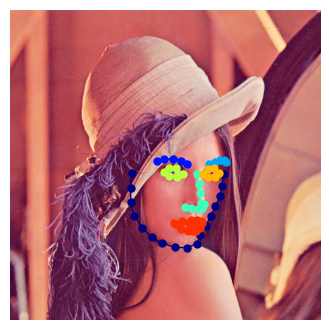

In [34]:
%matplotlib inline
import menpo.io as mio

im = mio.import_builtin_asset.lenna_png()
renderer = im.view_landmarks(figure_size=(6, 4))

Then the widget can be called as

In [35]:
save_wid = SaveFigureOptionsWidget(renderer, style='warning')
save_wid

Of course, this widget can be used as is in order to save any generated visualization.